### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import imdb
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, Dense, Dropout
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import random

c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Getting data

In [2]:
(train_raw_data, train_raw_labels), (test_raw_data, test_raw_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

In [3]:
word_index = imdb.get_word_index()
index_word = {word_index[key]: key for key in word_index}
def to_word(ind: int):
    return index_word.get(ind - 3, "?")

In [4]:
def vectorize(review_samples):
    result = np.zeros((len(review_samples), 10000))
    for i, ind in enumerate(review_samples):
        result[i, ind] += 1
    return result.astype("float32")

In [5]:
train_data = vectorize(train_raw_data)
test_data = vectorize(test_raw_data)
train_labels, test_labels = train_raw_labels.astype("float32"), test_raw_labels.astype("float32")

#### Network

In [24]:
model = keras.Sequential([
    Dense(16, activation="relu", name="Dense1", input_shape=(10000,)),
    Dropout(0.2),
    Dense(16, activation="relu", name="Dense2"),
    Dense(1, activation="sigmoid", name="Predication")])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [25]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=256, validation_split=0.2)

Epoch 1/20
79/79 [==============================] - 1s 9ms/step - loss: 0.4974 - acc: 0.7742 - val_loss: 0.3263 - val_acc: 0.8802
Epoch 2/20
79/79 [==============================] - 1s 8ms/ste

In [20]:
eval_loss, eval_acc = model.evaluate(test_data, test_labels, verbose=2)
print("Loss:", eval_loss, ". Accuracy: ", eval_acc)

782/782 - 1s - loss: 0.4272 - acc: 0.8683
Loss: 0.427219033241272 . Accuracy:  0.8682799935340881


#### Printing training

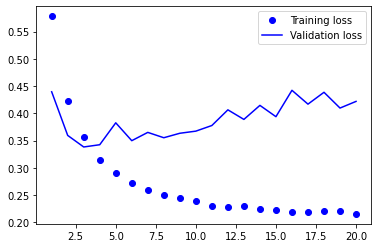

In [21]:
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.legend()
plt.show()

#### predicting

In [10]:
for ind in range(10):
    i = random.randint(0, len(test_raw_data) - 1)
    print(" ".join([to_word(g) for g in test_raw_data[i]]))
    print("negative" if round(model.predict(test_data[i].reshape(1, -1))[0][0]) == 0 else "positive")

? i love this movie at first i didn't expect much of this movie since i didn't hear anyone talk about it and it seemed like it went on video soon after it had just opened in the theatres i also didn't think david and ? would make a good on screen couple i've expected a lot out of on screen couples since i saw you've got mail and ? in seattle with tom hanks and meg ryan personally i think ? richardson should've played part and vice versa i don't know i just think ? should've stayed in the movie longer with david they seemed perfect for each other but it just figures that in a movie the girl next door always gets the guy like in while you were sleeping i was very wrong though this movie was fantastic everything was done brilliantly bonnie hunt did a great job of directing the lines were perfect with the wise cracks everywhere br br warning spoilers ahead br br i love how everything ? with each other for example in the beginning elizabeth and bob were talking about going to italy and in t

#### Experimental

7486